In [1]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
from statistics import mean 
import matplotlib.pyplot as plt
import matplotlib
import pickle
import joblib
from IPython.display import display

import random
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import load_model

from sklearn.cluster import KMeans
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import pandas as pd

Using TensorFlow backend.


In [2]:
num_classes = 6

In [3]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [4]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [5]:
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [6]:
# Load saved model
rms = RMSprop()
model = load_model('model-siamese.h5', custom_objects={'contrastive_loss':contrastive_loss, 'optimizer': rms, 'metrics':[accuracy]})

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



## Compute Accuracy

In [7]:
# Load anomaly matrix

anomaly_matrix = np.load('anomaly_matrix.npy')

In [8]:
# Create binary anomaly matrix for accuracy and frequency plots

anomaly_binary_matrix = np.zeros((anomaly_matrix.shape))
for num in range(anomaly_binary_matrix.shape[0]):
    for i in range(anomaly_binary_matrix.shape[1]):
        for j in range(anomaly_binary_matrix.shape[2]):
            anomaly_binary_matrix[num,i,j] = 1 if anomaly_matrix[num,i,j] < 0.1 else 0

In [9]:
# Calculate accuracy matrix 
accuracy_matrix=[]
for num in range(anomaly_binary_matrix.shape[0]):
    overall_pred = []
    for i in range(anomaly_binary_matrix.shape[2]):
        if num <= 5:
            pred = 1 if np.sum(anomaly_binary_matrix[num,:,i]) == 1 else 0
            overall_pred.append(pred)
        else :
            pred = 1 if np.mean(anomaly_binary_matrix[num,:,i]) == 0 else 0
            overall_pred.append(pred)
    accuracy_matrix.append(np.mean(overall_pred)*100)

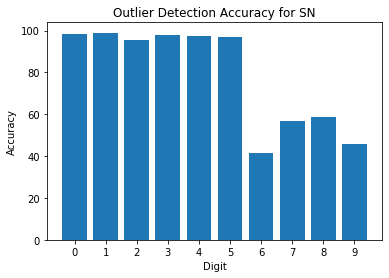

In [10]:
# Plotting accuracy vs digit 
plt.bar(np.arange(0,10), accuracy_matrix, label = 'test')
plt.xticks(np.arange(0, 10, 1))
plt.title('Outlier Detection Accuracy for SN')
plt.ylabel('Accuracy');
plt.xlabel('Digit');

## Frequency plot and mean activation plot over seen digits

In [11]:
# Subsetting only non seen digits

anomaly_unseen = anomaly_matrix[6:,:,:]
anomaly_unseen6 = anomaly_unseen[0,:,:]
anomaly_unseen7 = anomaly_unseen[1,:,:]
anomaly_unseen8 = anomaly_unseen[2,:,:]
anomaly_unseen9 = anomaly_unseen[3,:,:]

Text(0, 0.5, 'Counts')

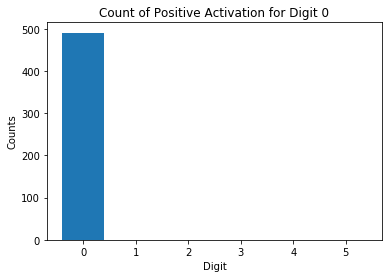

In [12]:
# plot frequency plot of positive activation for num = 0
freq_zero = np.count_nonzero(anomaly_binary_matrix[0,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_zero)
plt.title('Count of Positive Activation for Digit 0')
plt.xlabel('Digit')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

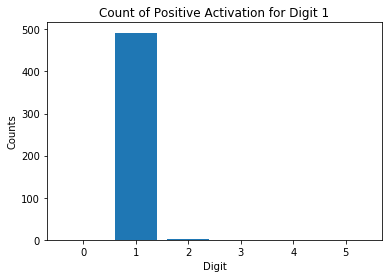

In [13]:
# plot frequency plot of positive activation for num = 1
freq_one = np.count_nonzero(anomaly_binary_matrix[1,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_one)
plt.title('Count of Positive Activation for Digit 1')
plt.xlabel('Digit')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

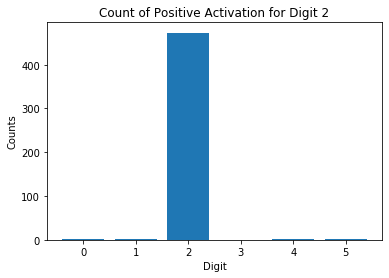

In [14]:
# plot frequency plot of positive activation for num = 2
freq_two = np.count_nonzero(anomaly_binary_matrix[2,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_two)
plt.title('Count of Positive Activation for Digit 2')
plt.xlabel('Digit')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

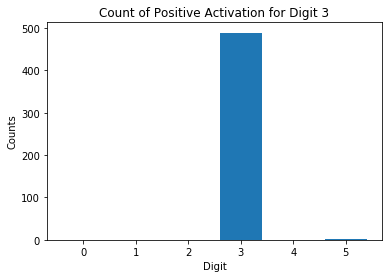

In [35]:
# plot frequency plot of positive activation for num = 3
freq_three = np.count_nonzero(anomaly_binary_matrix[3,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_three)
plt.title('Count of Positive Activation for Digit 3')
plt.xlabel('Digit')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

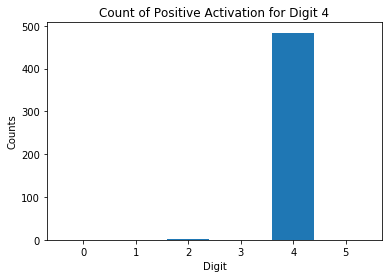

In [36]:
# plot frequency plot of positive activation for num = 4
freq_four = np.count_nonzero(anomaly_binary_matrix[4,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_four)
plt.title('Count of Positive Activation for Digit 4')
plt.xlabel('Digit')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

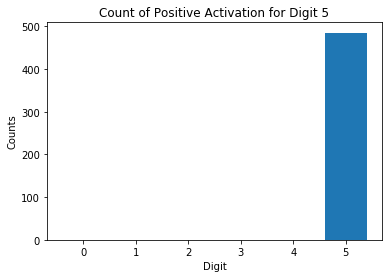

In [37]:
# plot frequency plot of positive activation for num = 5
freq_five = np.count_nonzero(anomaly_binary_matrix[5,:,:],axis=1)
plt.bar(np.arange(0,num_classes), freq_five)
plt.title('Count of Positive Activation for Digit 5')
plt.xlabel('Digit')
plt.ylabel('Counts')

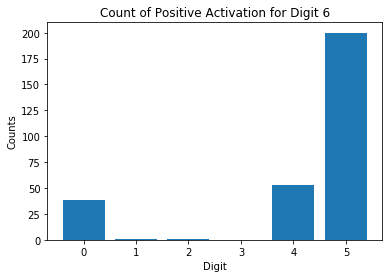

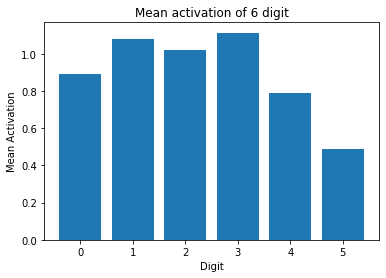

In [38]:
# plot frequency plot of positive activation and mean activation for num = 6

anomaly_mean6 = np.mean(anomaly_unseen6, axis = 1)
freq_six = np.count_nonzero(anomaly_binary_matrix[6,:,:],axis=1)

plt.bar(np.arange(0,num_classes), freq_six);
plt.title('Count of Positive Activation for Digit 6');
plt.xlabel('Digit');
plt.ylabel('Counts');
plt.show()

plt.bar(np.arange(0,num_classes),anomaly_mean6);
plt.title('Mean activation of 6 digit');
plt.ylabel('Mean Activation');
plt.xlabel('Digit');
plt.show()

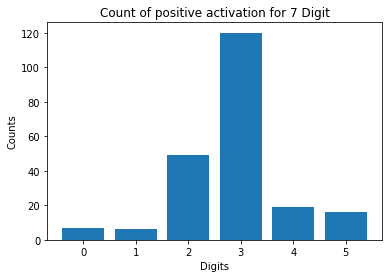

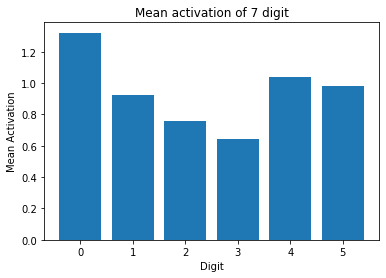

In [39]:
# plot frequency plot of positive activation and mean activation for num = 7

anomaly_mean7 = np.mean(anomaly_unseen7, axis = 1)
freq_seven = np.count_nonzero(anomaly_binary_matrix[7,:,:],axis=1)

plt.bar(np.arange(0,num_classes), freq_seven);
plt.title('Count of positive activation for 7 Digit');
plt.xlabel('Digits');
plt.ylabel('Counts');
plt.show()

plt.bar(np.arange(0,num_classes),anomaly_mean7);
plt.title('Mean activation of 7 digit');
plt.ylabel('Mean Activation');
plt.xlabel('Digit');
plt.show()


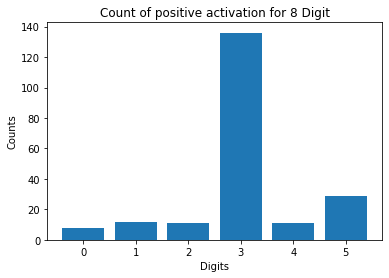

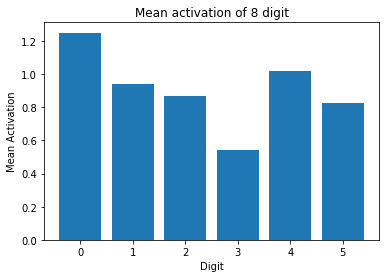

In [40]:
# plot frequency plot of positive activation and mean activation for num = 8

anomaly_mean8 = np.mean(anomaly_unseen8, axis = 1)
freq_eight = np.count_nonzero(anomaly_binary_matrix[8,:,:],axis=1)

plt.bar(np.arange(0,num_classes), freq_eight);
plt.title('Count of positive activation for 8 Digit');
plt.xlabel('Digits');
plt.ylabel('Counts');
plt.show()

plt.bar(np.arange(0,num_classes),anomaly_mean8);
plt.title('Mean activation of 8 digit');
plt.ylabel('Mean Activation');
plt.xlabel('Digit');
plt.show()


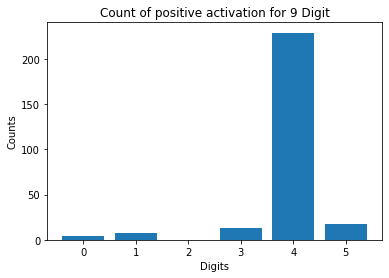

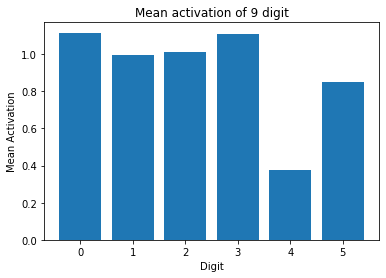

In [41]:
# plot frequency plot of positive activation and mean activation for num = 9

anomaly_mean9 = np.mean(anomaly_unseen9, axis = 1)
freq_nine = np.count_nonzero(anomaly_binary_matrix[9,:,:],axis=1)

plt.bar(np.arange(0,num_classes), freq_nine);
plt.title('Count of positive activation for 9 Digit');
plt.xlabel('Digits');
plt.ylabel('Counts');
plt.show()

plt.bar(np.arange(0,num_classes),anomaly_mean9);
plt.title('Mean activation of 9 digit');
plt.ylabel('Mean Activation');
plt.xlabel('Digit');
plt.show()


## Cluster Analysis for Zero shot learning

In [22]:
anomaly_unseen_reshape = np.concatenate((anomaly_unseen6, anomaly_unseen7, anomaly_unseen8, anomaly_unseen9), axis = 1) 

# Take transpose of it for cluster analysis
anomaly_unseen_reshape1 = anomaly_unseen_reshape.transpose()
anomaly_unseen_reshape2 = shuffle(anomaly_unseen_reshape1, random_state=0)

In [23]:
# Number of cluster = 4 (Since unseen digits is 4)

kmeans = KMeans(n_clusters=4, random_state=0).fit(anomaly_unseen_reshape2)

In [24]:
# Predict on individual digits and take mode cluster value

pred_six = kmeans.predict(anomaly_unseen6.T)
pred_six_cluster = stats.mode(pred_six)[0][0]

pred_seven = kmeans.predict(anomaly_unseen7.T)
pred_seven_cluster = stats.mode(pred_seven)[0][0]

pred_eight = kmeans.predict(anomaly_unseen8.T)
pred_eight_cluster = stats.mode(pred_eight)[0][0]

pred_nine = kmeans.predict(anomaly_unseen9.T)
pred_nine_cluster = stats.mode(pred_nine)[0][0]

In [25]:
print("Cluster mode of six digit is:", pred_six_cluster)
print("Cluster mode of seven digit is:", pred_seven_cluster)
print("Cluster mode of eight digit is:", pred_eight_cluster)
print("Cluster mode of nine digit is:", pred_nine_cluster)

Cluster mode of six digit is: 3
Cluster mode of seven digit is: 2
Cluster mode of eight digit is: 0
Cluster mode of nine digit is: 1


In [30]:
anomaly_unseen_reshape2 = np.zeros((anomaly_unseen_reshape1.shape[0],anomaly_unseen_reshape1.shape[1]+1))
anomaly_unseen_reshape2[:,:6] = anomaly_unseen_reshape1
pred_overall = kmeans.predict(anomaly_unseen_reshape1)
anomaly_unseen_reshape2[:,6] = pred_overall


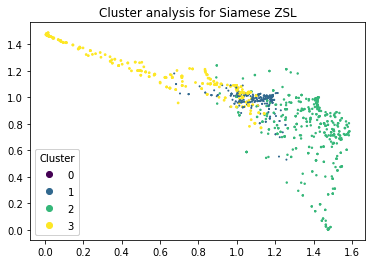

In [55]:
fig, ax = plt.subplots()
scatter = ax.scatter(anomaly_unseen_reshape2[:,0], anomaly_unseen_reshape2[:,1], c=anomaly_unseen_reshape2[:,6], s=anomaly_unseen_reshape2[:,6])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.title('Cluster analysis for Siamese ZSL')
plt.show()



In [51]:
# get unique counts of cluster for num = 6

np.unique(pred_six, return_counts = True)

(array([0, 1, 2, 3]), array([  1, 108,  51, 340], dtype=int64))

In [52]:
# get unique counts of cluster for num = 7

np.unique(pred_seven, return_counts = True)

(array([0, 1, 2, 3]), array([171,  35, 248,  46], dtype=int64))

In [53]:
# get unique counts of cluster for num = 8

np.unique(pred_eight, return_counts = True)

(array([0, 1, 2, 3]), array([250,  40, 133,  77], dtype=int64))

In [54]:
# get unique counts of cluster for num = 9

np.unique(pred_nine, return_counts = True)

(array([0, 1, 2, 3]), array([ 38, 333,  34,  95], dtype=int64))